# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

import numpy as np
%load_ext autoreload
%autoreload 2
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

par = model.par

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

Edgeworth box will pareto improved allocations can be found below


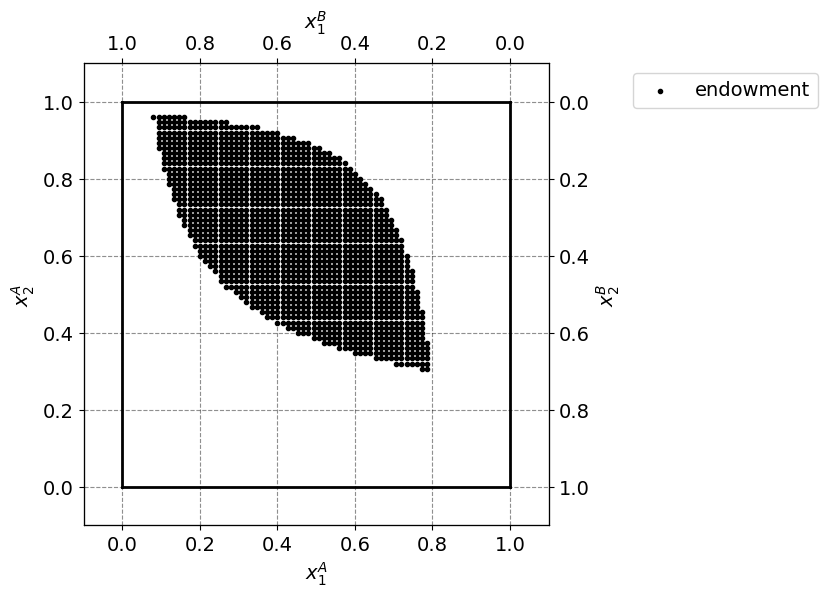

In [2]:
# We create parameters for the total endowment (which is normalised to 1 for both goods)
w1bar = 1.0
w2bar = 1.0

# Define number of steps N:
N = 75
steps = 1 / N

# Use numpy arrange to create pareto efficient allocations (which we call C)
C = [(x1A, x2A) for x1A in np.arange(0, 1 + steps, steps) for x2A in np.arange(0, 1 + steps, steps) for x1B in [1-x1A] for x2B in [1-x2A]
            if model.utility_A(x1A, x2A) >= model.utility_A(par.w1A, par.w2A)
            and model.utility_B(1 - x1A, 1 - x2A) >= model.utility_B(par.w1B, par.w2B)]
#print(C)
# Unpacking pareto allocations for person A
x1A_C, x2A_C = zip(*C)

# The figure formats are being set:
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

print('Edgeworth box will pareto improved allocations can be found below')

# The scatterplot is defined
ax_A.scatter(x1A_C, x2A_C,marker='.',color='black',label='endowment')

# axis and axis limites are being created:
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

Explain your code and procedure

In [3]:
#First we define price for good 1
P1 = [(0.5 + 2*i/75) for i in range(75)]

#Here we make calculations for errors in market for good 1 and 2
errors = [model.check_market_clearing(x) for x in P1]
eps1 = [x[0] for x in errors]
eps2 = [x[1] for x in errors]

#We import panda to create DataFramce
import pandas as pd

#Here we create DataFrame 
df = pd.DataFrame(errors, columns=['eps1', 'eps2'])
print(df)

        eps1      eps2
0   0.533333 -0.266667
1   0.475949 -0.250667
2   0.424096 -0.234667
3   0.377011 -0.218667
4   0.334066 -0.202667
..       ...       ...
70 -0.360563  0.853333
71 -0.363231  0.869333
72 -0.365840  0.885333
73 -0.368392  0.901333
74 -0.370889  0.917333

[75 rows x 2 columns]


# Question 3

In [4]:
#We print out the results from the exchangeeconomy that that finds p1 that clears market


result = model.find_market_clearing()
print("Optimal p1 value:", result[0])


# We test if demand is correct. Sum of good 1 should equal 1 and same with good 2. 
# Demand for Agent A
demand_x1A, demand_x2A = model.demand_A(p1 = 0.9533333333333334)
print("Demand for good 1 by Agent A:", demand_x1A)
print("Demand for good 2 by Agent A:", demand_x2A)

# Demand for Agent B
demand_x1B, demand_x2B = model.demand_B(p1 = 0.9533333333333334)
print("Demand for good 1 by Agent B:", demand_x1B)
print("Demand for good 2 by Agent B:", demand_x2B)

#Price is seems right. Demand lines up.

Optimal p1 value: 0.9533333333333334
Demand for good 1 by Agent A: 0.37156177156177156
Demand for good 2 by Agent A: 0.7084444444444445
Demand for good 1 by Agent B: 0.6228438228438228
Demand for good 2 by Agent B: 0.2968888888888889


ADD CONCISE CONLUSION.

# Question 4

In [10]:
print('Question 4a:')
# creating a float with lowest possible utility to be changed in loop
maximum_util_A = float('-inf') 
# creating placeholders for optimal (for A) price and allocation
price = () 
allocation = ()

for x in P1:
    #calculation the allocation for B and then A for price x in P1
    x1B, x2B = model.demand_B(x) 
    x1A = 1 - x1B
    x2A = 1 - x2B
    util_A = model.utility_A(x1A, x2A)

    # When the allocation exists and a greater utility then the previously found maximum utility is found
    #, we update the values for utility, allocation and price
    if x1B <=1 and x2B <= 1 and util_A > maximum_util_A:
            maximum_util_A = util_A
            price = x
            allocation = (x1A, x2A)

print("The maximum utility for A, when they set the price (within P1) is: ", maximum_util_A)
print('This utility is found when the price for product 1 is set to ',price ,'(and p2=1)')
print('This yields the allocation x1A,x2A: ', allocation, 'and x1B,x2B:', (1-allocation[0],1-allocation[1]))

Question 4a:
The maximum utility for A, when they set the price (within P1) is:  0.633615985237553
This utility is found when the price for product 1 is set to  1.8866666666666667 (and p2=1)
This yields the allocation x1A,x2A:  (0.619316843345112, 0.6408888888888888) and x1B,x2B: (0.38068315665488806, 0.35911111111111116)


In [11]:
print('Question 4.B:')




Question 4.B:


# Question 5

In [7]:
# Question 5. How do you get the big 'Question' font like in the previous questions
# Agent A now chooses his and B's consumption because he is a market maker.
# Here we need to find the optimal allocation for agent A under the following restrictions
# Utility for agent A needs to be weakly bigger than utility for agent A with endowment (w1A = 0.8, w2A = 0.3)
# Utility for agent B needs to be weakly bigger than utility for agent B with endowment (w1B = 0.2, w2B = 0.7)
# Walras equation. Demand for good k for agent i needs to be 1 minus demand for good k for agent j.

def market_clearing()

SyntaxError: expected ':' (119377880.py, line 8)

# Question 6

In [ ]:
#